# Lab on Gaussian Mixture Models (GMM) and Expectation Maximization (EM) technique

No Generative AI or fancy IDE have been used or harmed in the making of this notebook. Just plain and tasteless Jupyter Lab and Google.

## Imports

In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data1 = pd.read_csv("./assets/data1.csv")
data2 = pd.read_csv("./assets/data2.csv")

data1.head(), data2.head()

(         X1        X2  truth
 0  6.488267  0.250064      4
 1  2.521947 -2.697986      3
 2  3.068773 -2.900076      3
 3  4.314275  0.702951      1
 4  2.384499 -2.535635      3,
          X1        X2  truth
 0  9.065013  3.669309      4
 1 -0.250513 -0.981009      3
 2  0.212164 -0.863954      3
 3  6.752254  2.902041      1
 4 -0.216189 -0.914358      3)

In [61]:
data1.describe()

,X1,X2,truth
count,400.000000,400.000000,400.000000
mean,3.953196,0.006099,2.500000
std,2.599850,1.608781,1.119434
min,-0.765892,-2.948656,1.000000
25%,1.722223,-1.458826,1.750000
50%,3.554779,0.003041,2.500000
75%,5.639371,1.483425,3.250000
max,9.263907,3.437618,4.000000


In [62]:
data2.describe()

,X1,X2,truth
count,400.000000,400.000000,400.000000
mean,5.325686,2.109689,2.500000
std,2.997913,1.351159,1.119434
min,-0.913062,-1.106063,1.000000
25%,2.774800,1.267234,1.750000
50%,5.595173,2.487687,2.500000
75%,7.859419,3.096727,3.250000
max,10.765121,4.676537,4.000000


In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   truth   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [64]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   truth   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [65]:
data1.isnull().sum(), data2.isnull().sum()

(X1       0
 X2       0
 truth    0
 dtype: int64,
 X1       0
 X2       0
 truth    0
 dtype: int64)

Both datasets seem to be already organized and prepared

## Expectation-Maximization (EM)

### GMM vs k-means

Text(0, 0.5, 'X2')

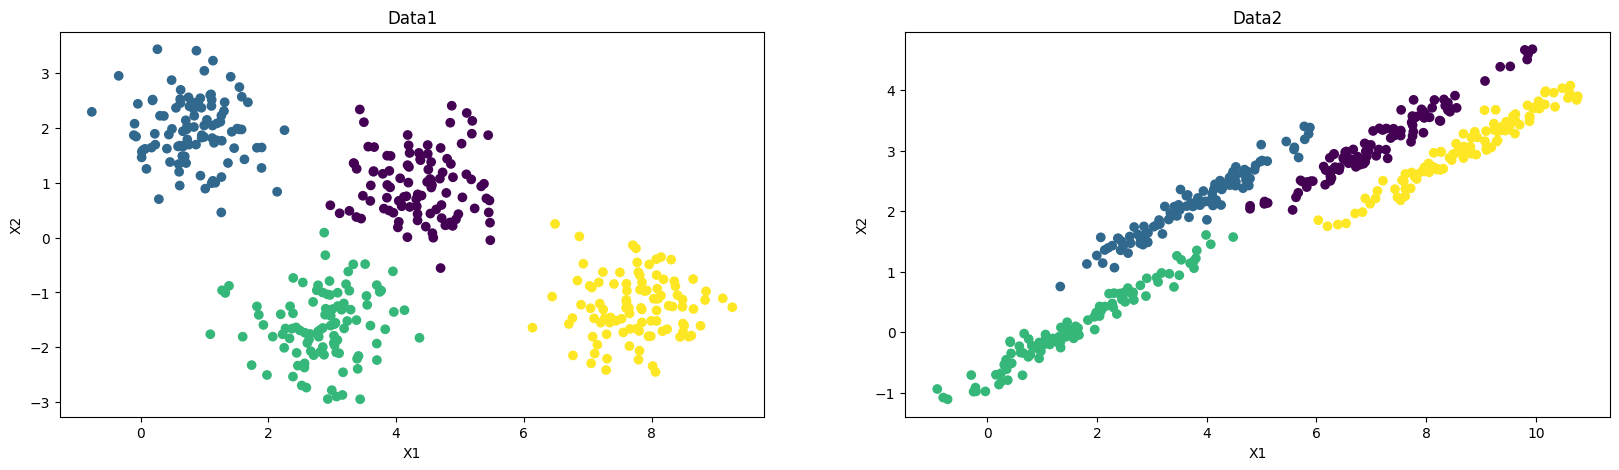

In [66]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(data1["X1"], data1["X2"], c=data1["truth"])
plt.title("Data1")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1, 2, 2)
plt.scatter(data2["X1"], data2["X2"], c=data2["truth"])
plt.title("Data2")
plt.xlabel("X1")
plt.ylabel("X2")

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans_model = KMeans(n_clusters=4)

In [69]:
clusters_data1 = kmeans_model.fit_predict(data1.iloc[:,:2])
clusters_data2 = kmeans_model.fit_predict(data2.iloc[:,:2])

Text(0, 0.5, 'X2')

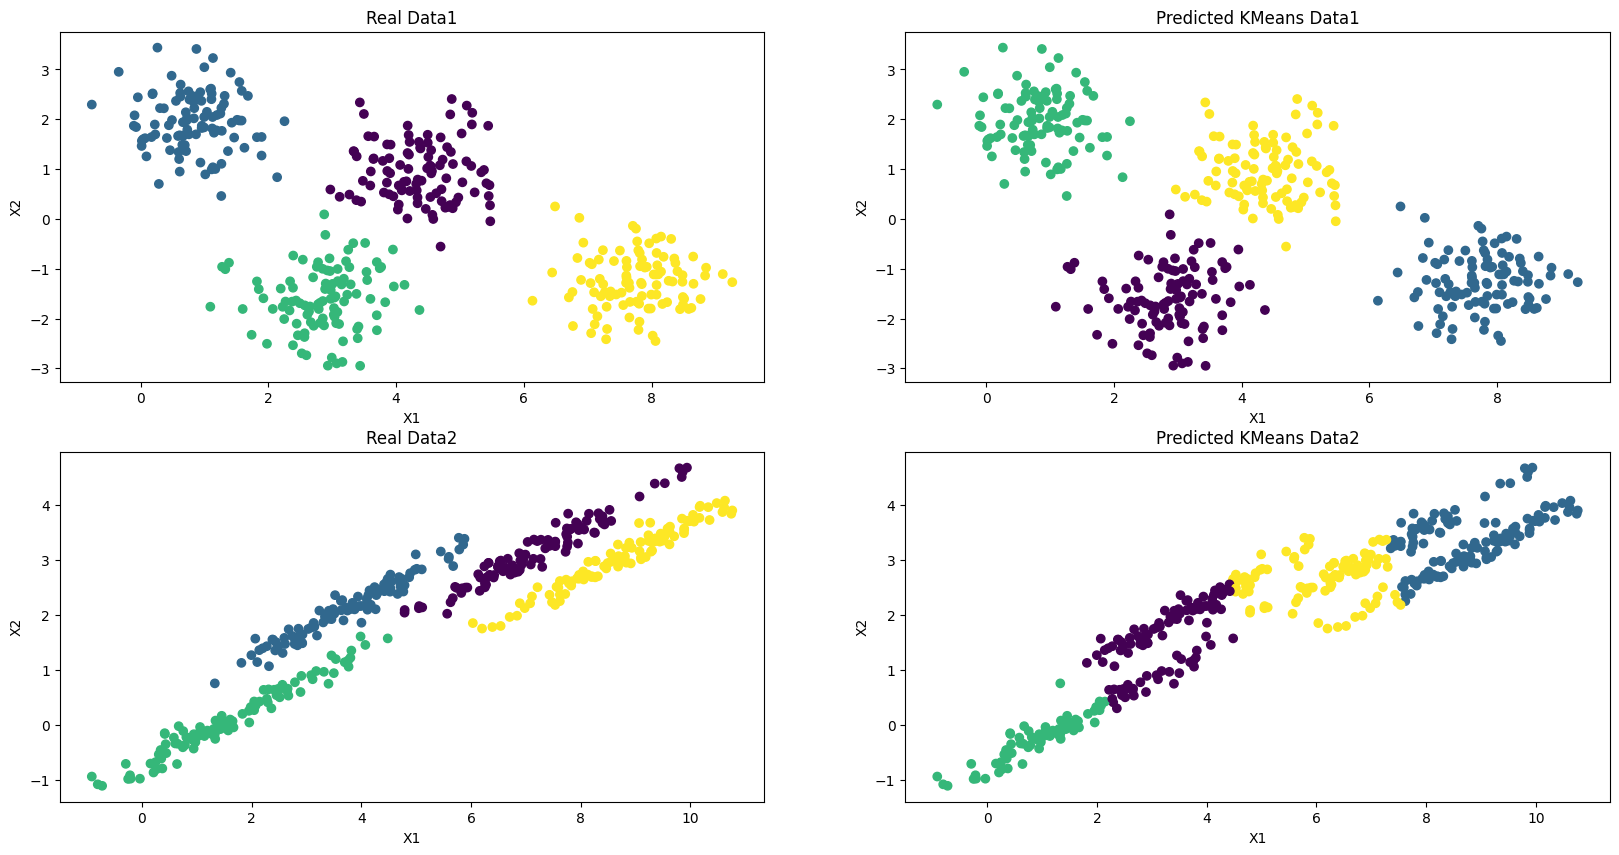

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.scatter(data1["X1"], data1["X2"], c=data1["truth"])
plt.title("Real Data1")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 2)
plt.scatter(data1["X1"], data1["X2"], c=clusters_data1)
plt.title("Predicted KMeans Data1")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 3)
plt.scatter(data2["X1"], data2["X2"], c=data2["truth"])
plt.title("Real Data2")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 4)
plt.scatter(data2["X1"], data2["X2"], c=clusters_data2)
plt.title("Predicted KMeans Data2")
plt.xlabel("X1")
plt.ylabel("X2")

The shape of the cluster in `Data1` helps with the KMeans procedure. This is the reason why the clustering is "perfect".
On the other hand, `Data2` has linear shaped clusters which is not well supported by KMeans.

In [71]:
from sklearn.mixture import GaussianMixture

### GMM on Data1

In [72]:
gm_model = GaussianMixture(n_components=4)
gm_model.fit(data1.iloc[:,:2])
gm_clusters_data1 = gm_model.predict(data1.iloc[:,:2])

gm_weights_data1 = gm_model.weights_
gm_means_data1 = gm_model.means_
gm_covariances_data1 = gm_model.covariances_

Text(0.5, 1.0, 'Contour plot of Data1 on GMM labels')

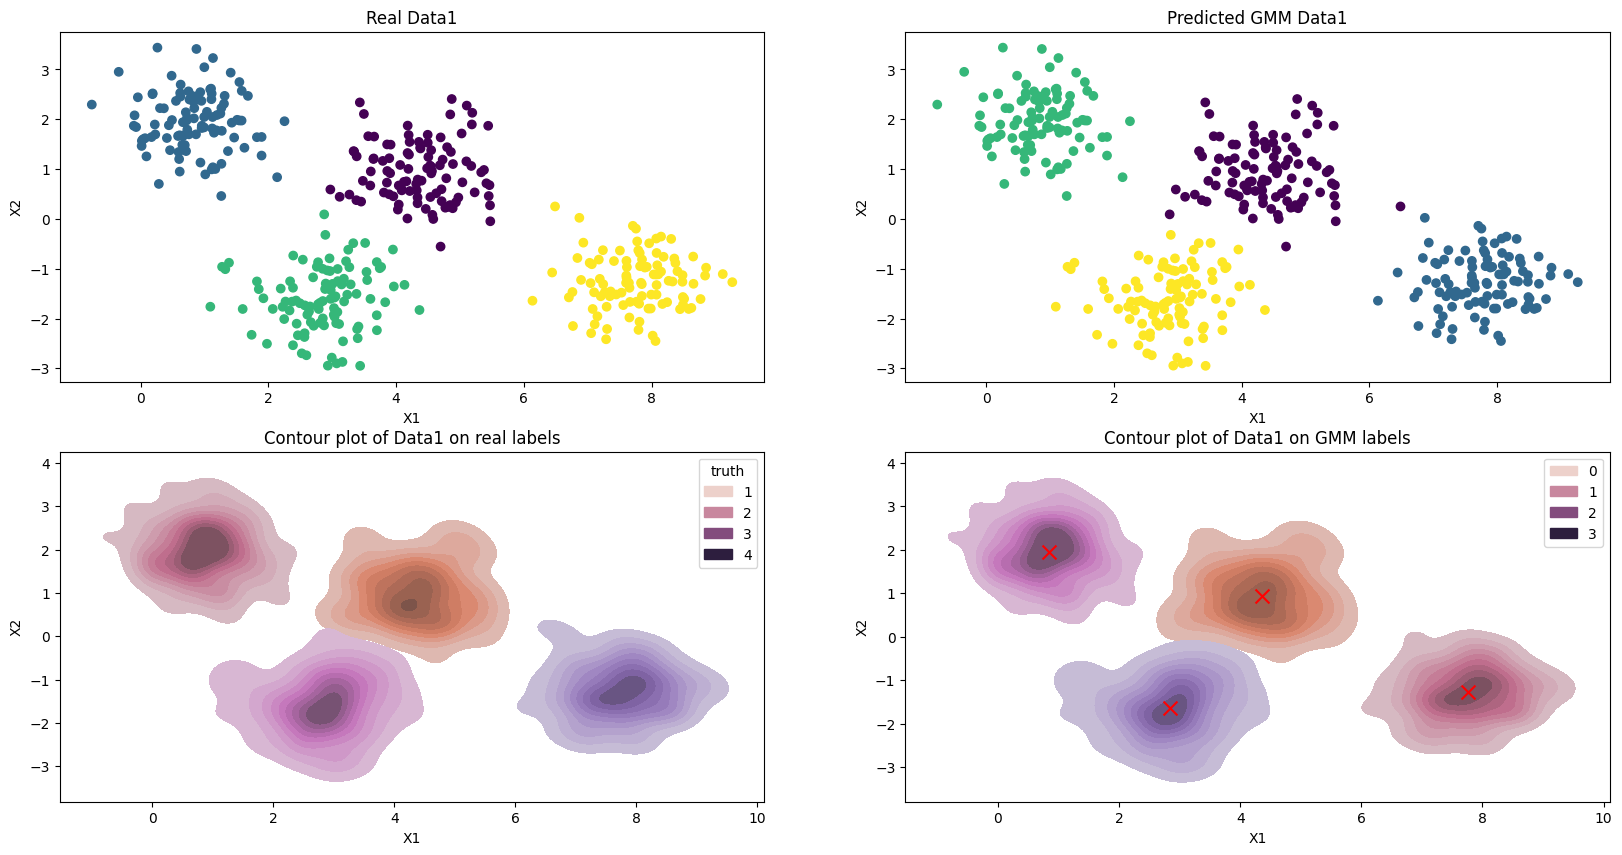

In [73]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.scatter(data1["X1"], data1["X2"], c=data1["truth"])
plt.title("Real Data1")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 2)
plt.scatter(data1["X1"], data1["X2"], c=gm_clusters_data1)
plt.title("Predicted GMM Data1")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 3)
sns.kdeplot(x=data1["X1"], y=data1["X2"], fill=True, hue=data1["truth"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Contour plot of Data1 on real labels")

plt.subplot(2, 2, 4)
sns.kdeplot(x=data1["X1"], y=data1["X2"], fill=True, hue=gm_clusters_data1)
for centroid in gm_means_data1:
    plt.scatter(centroid[0], centroid[1], s=100, c="red", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Contour plot of Data1 on GMM labels")

In [74]:
print("Weights:\n", gm_weights_data1)

Weights:
 [0.25454734 0.24878736 0.24963804 0.24702726]


The weights represent the probability for each cluster to be chosen. Matter of fact, the weights are the same for each cluster. This is due to the fact that the data is well distributed.

In [75]:
print("Means:\n", gm_means_data1)

Means:
 [[ 4.36221851  0.93141671]
 [ 7.76222624 -1.27635633]
 [ 0.83760086  1.9579654 ]
 [ 2.84407337 -1.62828783]]


The means represent the center of each clusters. We can spot the red X on the plot above.

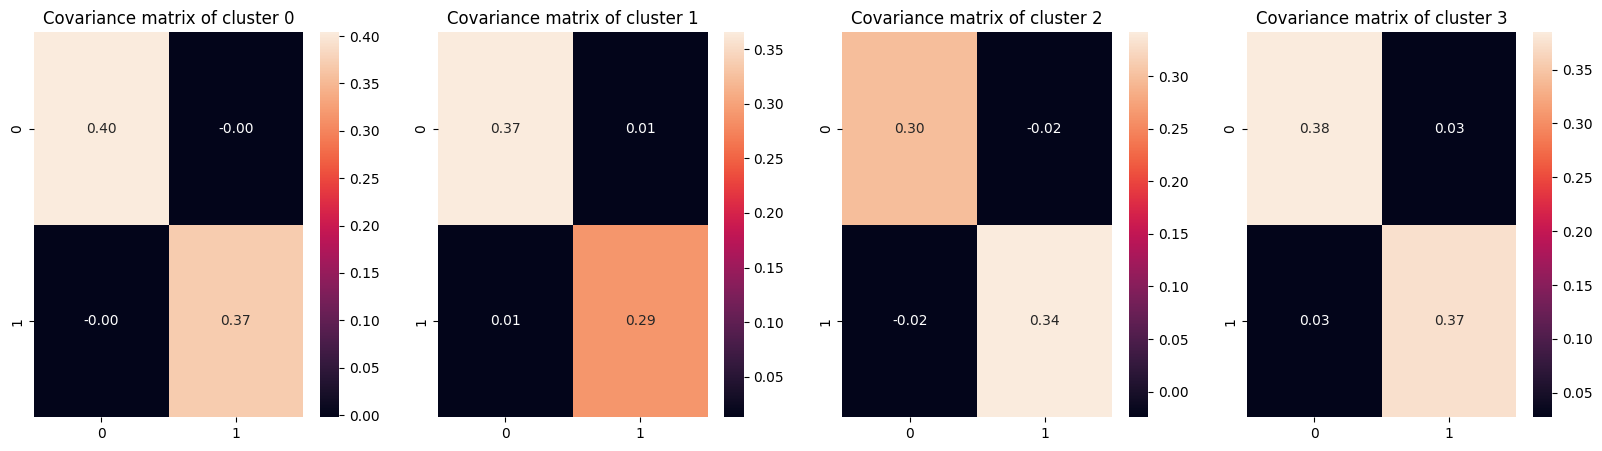

In [76]:
plt.subplots(1, 4, figsize=(20,5))

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.heatmap(gm_covariances_data1[i], annot=True, fmt=".2f")
    plt.title(f"Covariance matrix of cluster {i}")

When it comes to the covariance matrix, we can see that the matrix is diagonal. This is the effect of the distribution of the data. Furthermore, the covariance matrix is the same for each cluster as each cluster has the same shape.

### GMM on Data2

In [77]:
gm_model.fit(data2.iloc[:,:2])

gm_clusters_data2 = gm_model.predict(data1.iloc[:,:2])

gm_weights_data2 = gm_model.weights_
gm_means_data2 = gm_model.means_
gm_covariances_data2 = gm_model.covariances_

Text(0.5, 1.0, 'Contour plot of Data2 on GMM labels')

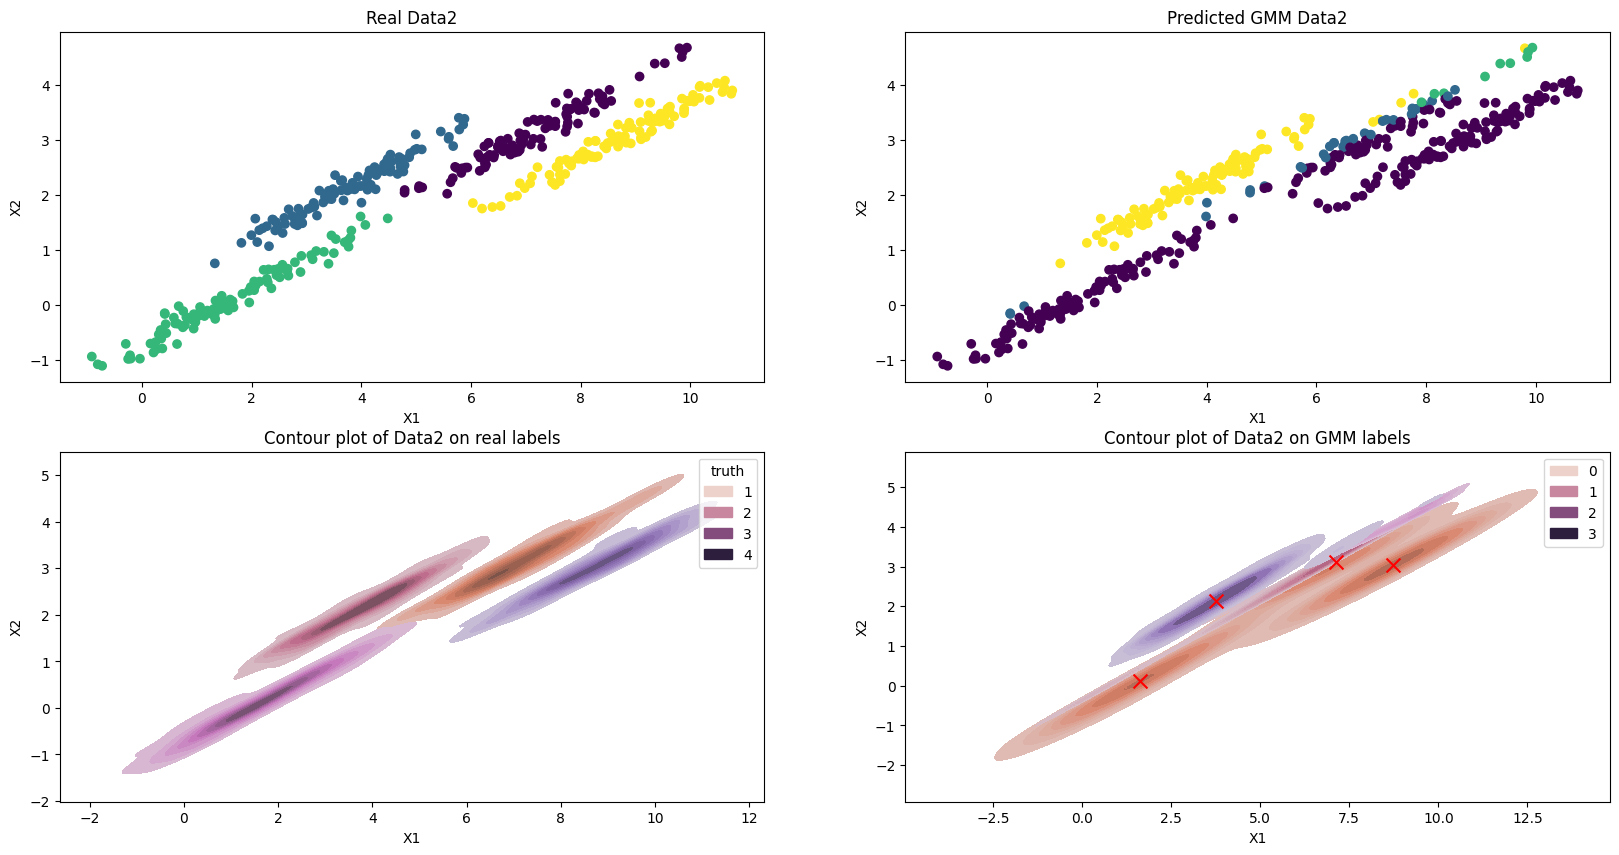

In [78]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.scatter(data2["X1"], data2["X2"], c=data2["truth"])
plt.title("Real Data2")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 2)
plt.scatter(data2["X1"], data2["X2"], c=gm_clusters_data2)
plt.title("Predicted GMM Data2")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 3)
sns.kdeplot(x=data2["X1"], y=data2["X2"], fill=True, hue=data2["truth"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Contour plot of Data2 on real labels")

plt.subplot(2, 2, 4)
sns.kdeplot(x=data2["X1"], y=data2["X2"], fill=True, hue=gm_clusters_data2)
for centroid in gm_means_data2:
    plt.scatter(centroid[0], centroid[1], s=100, c="red", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Contour plot of Data2 on GMM labels")

In [79]:
print("Weights:\n", gm_weights_data2)

Weights:
 [0.24836002 0.24690829 0.25520197 0.24952972]


As for `Data1`, the weights of `Data2` are the same for each cluster.

In [80]:
print("Means:\n", gm_means_data2)

Means:
 [[8.71706553 3.0318259 ]
 [1.62584064 0.11098741]
 [7.12590831 3.12407154]
 [3.77003449 2.13213669]]


The center of the clusters are fairly well placed even though the clusters are not perfectly separated.

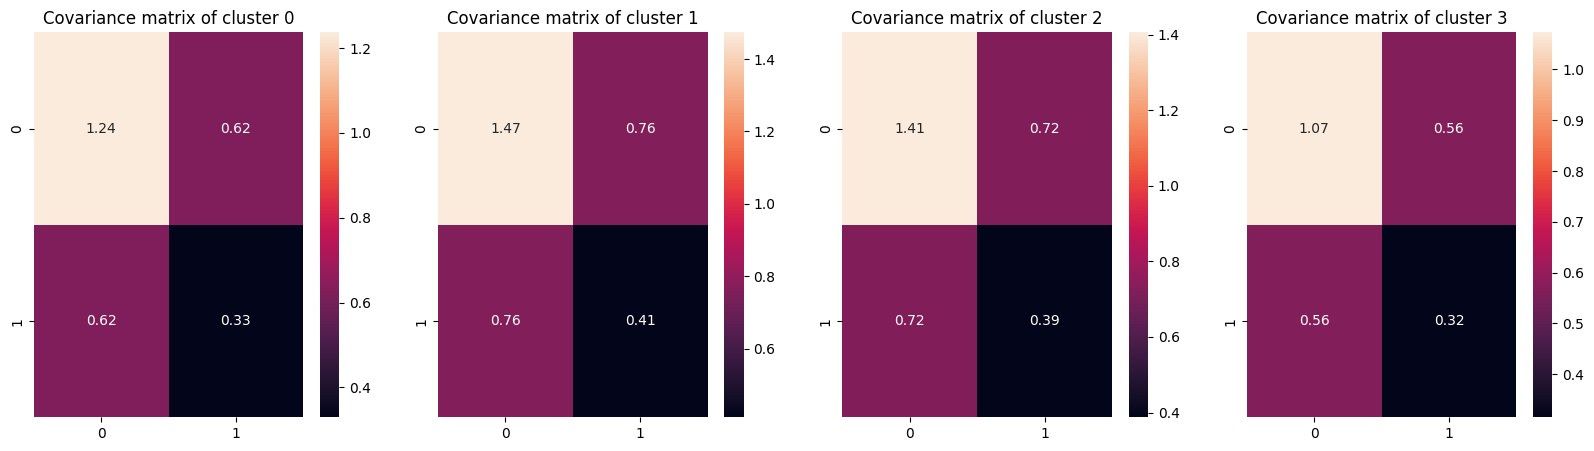

In [81]:
plt.subplots(1, 4, figsize=(20,5))

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.heatmap(gm_covariances_data2[i], annot=True, fmt=".2f")
    plt.title(f"Covariance matrix of cluster {i}")

We can see that the covariance matrix is not diagonal for this dataset. In fact, the clusters are linearly shaped. We can find a similar covariance matrix for each cluster even though some clusters are more spread than others.

When using GMM, we can easily spot that it works in better than KMeans for both scenarios (circular and linear shaped clusters). Unfortunately, the results are not perfect for `Data2` but we can notice that it understood the shape and tried to separate the clusters accordingly.

NOTE: The random state might affect the clustering as GMM initializes randomly.

## EM on 1D

In [82]:
np.random.seed(20200324)

data = pd.DataFrame({
    "X": np.concatenate([np.random.normal(-5, 1, 100), np.random.normal(0, 1, 100), np.random.normal(5, 1, 100)]),
    "source": np.concatenate([np.repeat(0, 100), np.repeat(1, 100), np.repeat(2, 100)])
})

data

,X,source
0,-6.612368,0
1,-3.744248,0
2,-5.827059,0
3,-6.689713,0
4,-4.539141,0
...,...,...
295,7.408951,2
296,4.659735,2
297,3.912970,2
298,4.443757,2


Text(0, 0.5, 'Frequency')

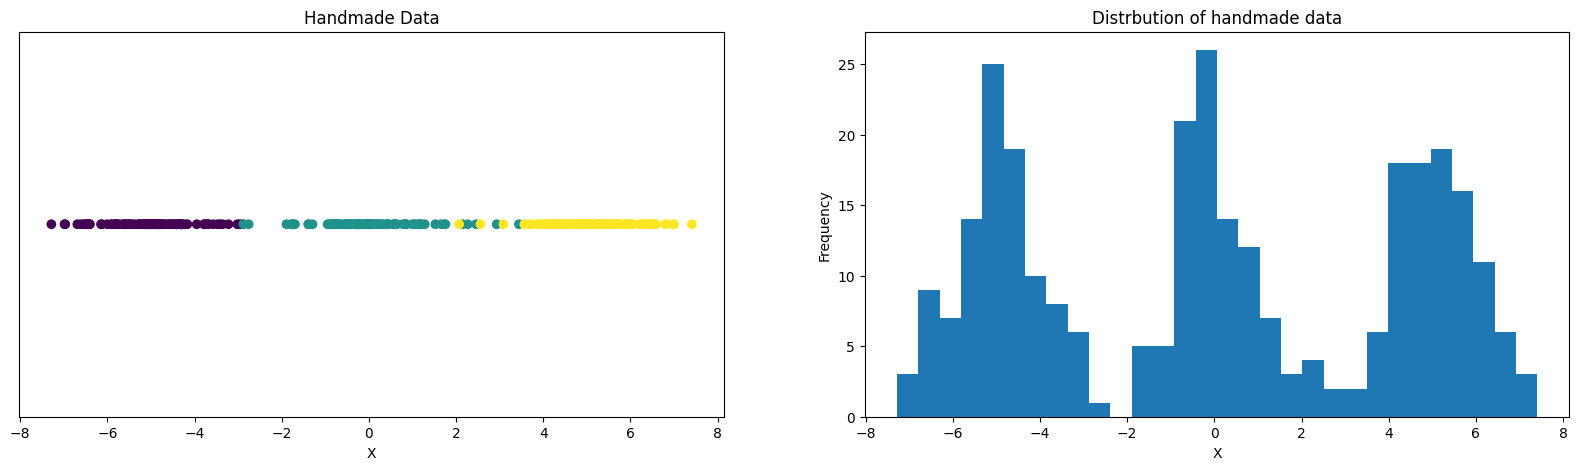

In [83]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(data["X"], np.repeat(0, 300), c=data["source"])
plt.title("Handmade Data")
plt.xlabel("X")
plt.yticks([])

plt.subplot(1, 2, 2)
plt.hist(data["X"], bins=30, label="Handmade Data")
plt.title("Distrbution of handmade data")
plt.xlabel("X")
plt.ylabel("Frequency")

We can see the 3 clusters on the plot respectively following their Normal distribution.

1. Cluster 0: Mean = -5, Variance 1
2. Cluster 1: Mean = 0, Variance 1
3. Cluster 2: Mean = 5, Variance 1


In [84]:
gm_model_handmade = GaussianMixture(n_components=3)
gm_model_handmade.fit(data[["X"]])

gm_clusters_handmade = gm_model_handmade.predict(data[["X"]])

gm_weights_handmade = gm_model_handmade.weights_
gm_means_handmade = gm_model_handmade.means_
gm_covariances_handmade = gm_model_handmade.covariances_

([], [])

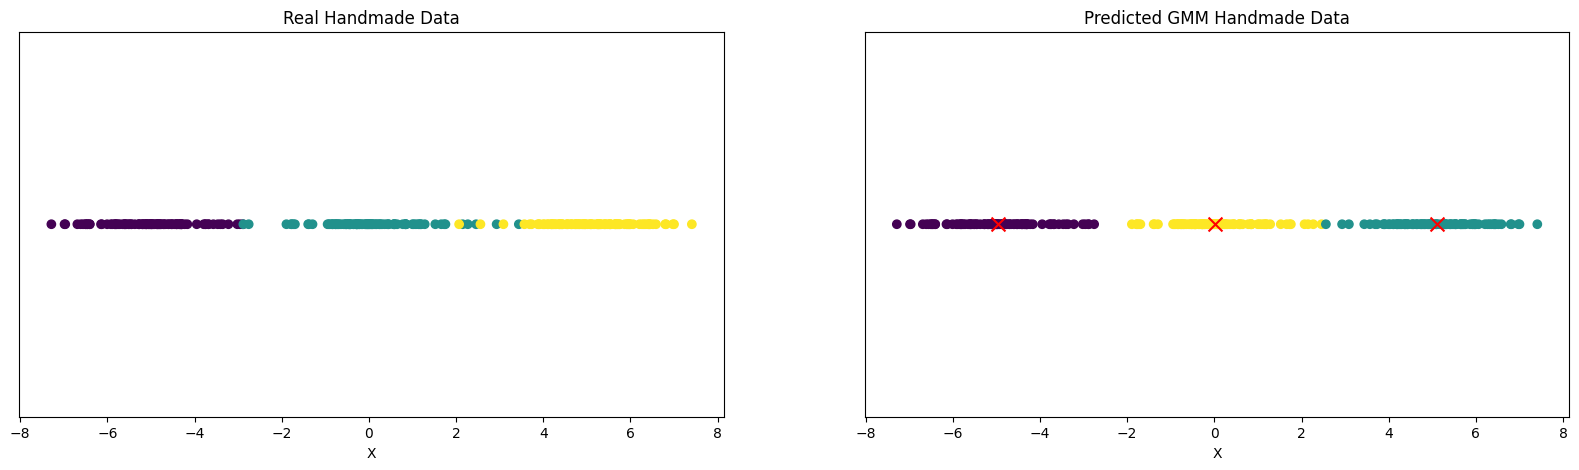

In [85]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(data["X"], np.repeat(0, 300), c=data["source"])
plt.title("Real Handmade Data")
plt.xlabel("X")
plt.yticks([])

plt.subplot(1, 2, 2)
plt.scatter(data["X"], np.repeat(0, 300), c=gm_clusters_handmade)
for centroid in gm_means_handmade:
    plt.scatter(centroid, 0, s=100, c="red", marker="x")
plt.title("Predicted GMM Handmade Data")
plt.xlabel("X")
plt.yticks([])

The GMM is able to find the clusters and their means pretty accurately.

In [86]:
print("Weights:\n", gm_weights_handmade)

Weights:
 [0.33925483 0.33639324 0.32435194]


In [87]:
print("Means:\n", gm_means_handmade)

Means:
 [[-4.96681553]
 [ 5.1091508 ]
 [ 0.02427541]]


We defined the means to be -5, 0 and 5. The GMM was able to find the means with a small error.

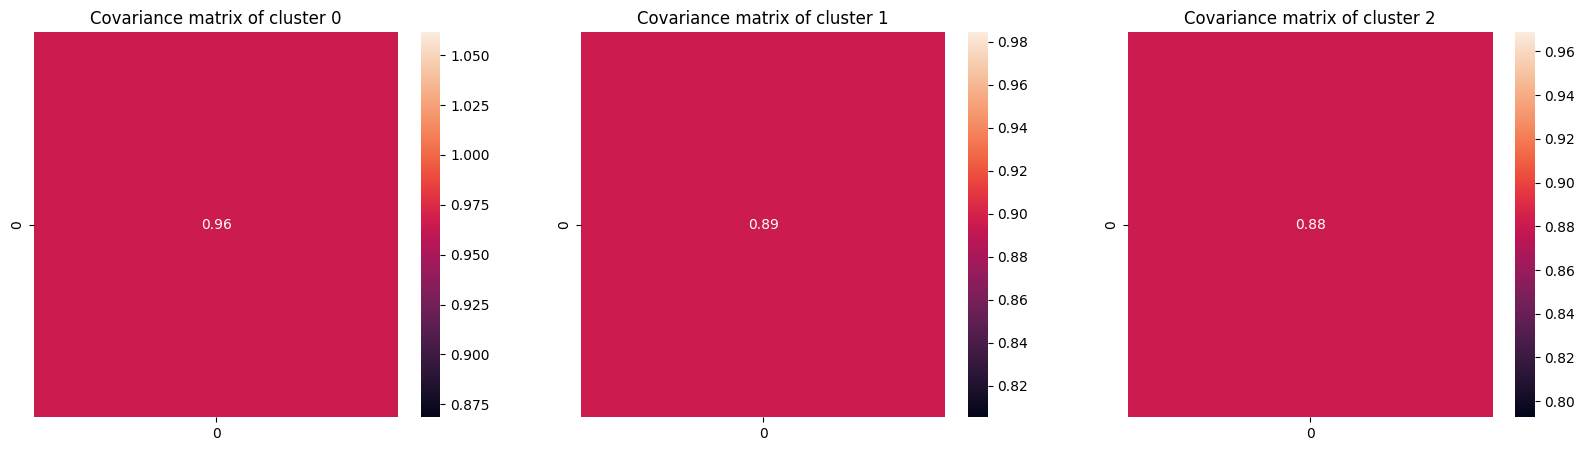

In [88]:
plt.subplots(1, 3, figsize=(20,5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.heatmap(gm_covariances_handmade[i], annot=True, fmt=".2f")
    plt.title(f"Covariance matrix of cluster {i}")

We defined the variance for all clusters to be 1. The GMM covariance matrices for each cluster is equal to 1. As we are in a 1D space so the covariance matrix is a scalar, Thus the GMM was able to find the variance with a small error just like the means.

Text(0, 0.5, 'Density')

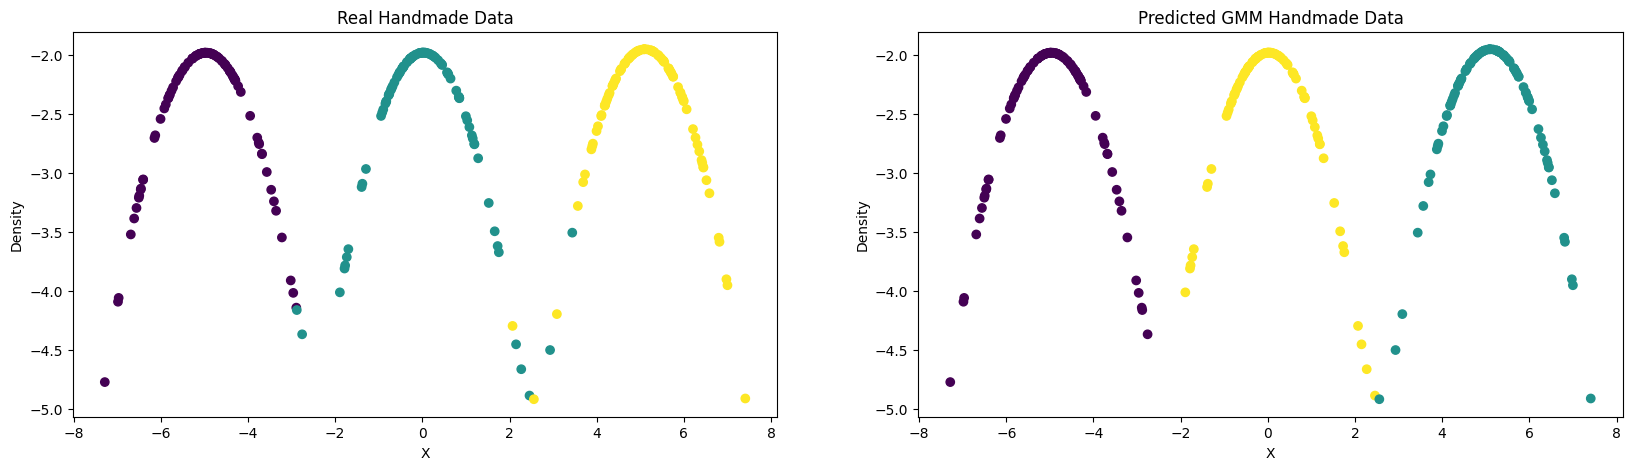

In [89]:
data["density"] = gm_model_handmade.score_samples(data[["X"]])

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(data["X"], data["density"], c=data["source"])
plt.title("Real Handmade Data")
plt.xlabel("X")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.scatter(data["X"], data["density"], c=gm_clusters_handmade)
plt.title("Predicted GMM Handmade Data")
plt.xlabel("X")
plt.ylabel("Density")


With these plots, we can easily verify what was mentioned above. The normal curves are centered at the means -5, 0 and 5 with a variance of 1.

## EM from Scratch

Declare hyperparameters and data generation parameters

In [90]:
np.random.seed(20200324)
K = 7
N = 300

Dynamically create K clusters with random means and covariances. I initialized the space to be between -20 and 20 on x and y axis.

In [91]:
def create_parameters(K: int) -> tuple:
    """Create synthetic parameters for a GMM model
    
    Args:
        K (int): Number of clusters
        
    Returns:
        tuple: Tuple containing means, covariances, and mixing coefficients
    """
    means = np.random.uniform(-20, 20, (K, 2))
    covariances = np.array([np.eye(2) * np.random.uniform(1, 5) for _ in range(K)], dtype=np.float64)
    mixing_coeffs = np.random.dirichlet(np.ones(K))
    return means, covariances, mixing_coeffs

means, covariances, mixing_coeffs = create_parameters(K)

def create_data(K: int, N: int) -> pd.DataFrame:
    """Create a synthetic dataset with K clusters and N samples

    Args:
        K (int): Number of clusters
        N (int): Number of samples

    Returns:
        pd.DataFrame: Synthetic dataset
    """
    data = pd.DataFrame(columns=["X1", "X2", "truth"])

    for _ in range(N):
        z = np.random.choice(K, p=mixing_coeffs)
        new_data = np.random.multivariate_normal(means[z], covariances[z])
        data = pd.concat([data, pd.DataFrame({"X1": [new_data[0]], "X2": [new_data[1]], "truth": [z]})], ignore_index=True)
        
    return data

scratch_data_2d = create_data(K, N)

C:\Users\nicol\AppData\Local\Temp\ipykernel_1380\2951170866.py:32: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Text(0, 0.5, 'X2')

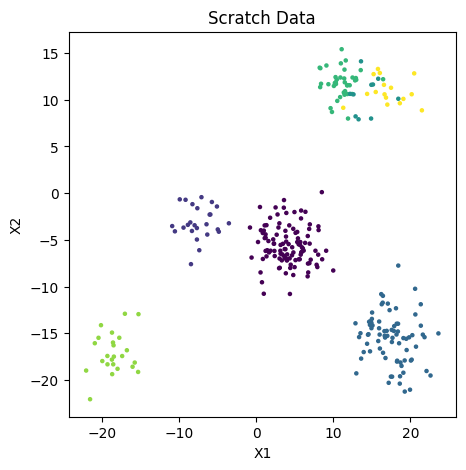

In [92]:
plt.figure(figsize=(5,5))

plt.scatter(scratch_data_2d["X1"], scratch_data_2d["X2"], c=scratch_data_2d["truth"], s=5)
plt.title("Scratch Data")
plt.xlabel("X1")
plt.ylabel("X2")


As we created diagonal covariance matrices, the clusters are circular shaped.

Training a From-Scratch GMM

In [93]:
train_means, train_covariances, train_mixing_coeffs = create_parameters(K)

The weights are randomly initialized.

In [94]:
train_mixing_coeffs

array([0.02977379, 0.10720056, 0.2697249 , 0.23998124, 0.07324202,
       0.10045165, 0.17962584])

The centers are randomly initialized.

In [95]:
train_means

array([[ 17.3672166 ,  17.51812017],
       [-13.95712521,  18.61841178],
       [ -5.65063011,  -7.46968579],
       [-12.22987097,   5.86423797],
       [ -8.76889642,  16.50364672],
       [  6.74306371,  -5.18804564],
       [ -6.24798181,   3.40809179]])

Text(0, 0.5, 'X2')

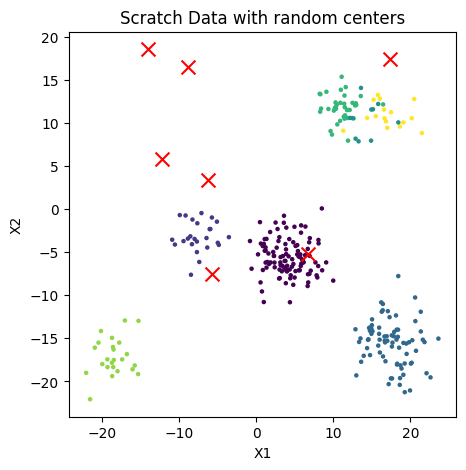

In [96]:
plt.figure(figsize=(5,5))
plt.scatter(scratch_data_2d["X1"], scratch_data_2d["X2"], c=scratch_data_2d["truth"], s=5)
for i in range(K):
    plt.scatter(train_means[i][0], train_means[i][1], s=100, c="red", marker="x")
plt.title("Scratch Data with random centers")
plt.xlabel("X1")
plt.ylabel("X2")


Randomly initialize the covariance matrices as well.

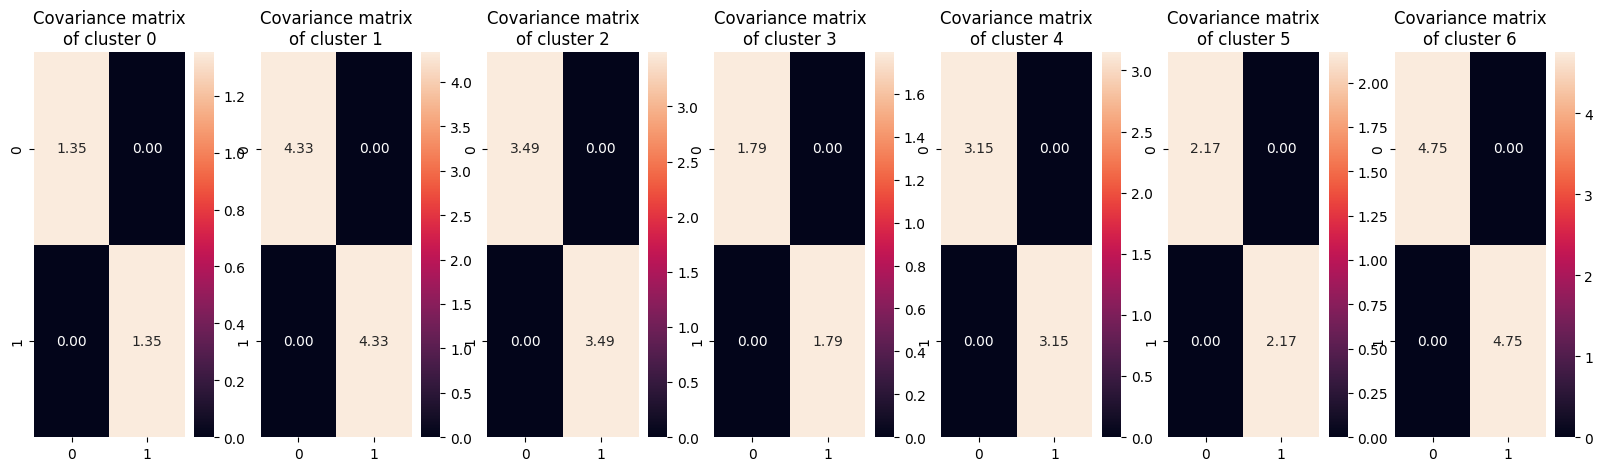

In [97]:
plt.figure(figsize=(20,5))

for i in range(K):
    plt.subplot(1, K, i+1)
    sns.heatmap(train_covariances[i], annot=True, fmt=".2f")
    plt.title(f"Covariance matrix\nof cluster {i}")

In [98]:
# This function is was defined to fix a bug

def convert_to_python_floats(obj: object) -> object:
    """Convert np.float64 to Python float in a nested structure
    
    Args:
        obj (object): Object to convert
        
    Returns:
        object: Object with np.float64 converted to Python float
    """
    if isinstance(obj, np.float64):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return np.array([convert_to_python_floats(item) for item in obj])
    elif isinstance(obj, list):
        return [convert_to_python_floats(item) for item in obj]
    else:
        return obj

We have to define a function to calculate the log-likehood of the data given the parameters.

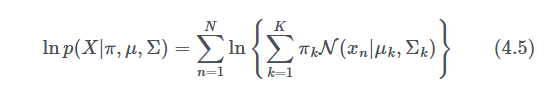

In [99]:
def gaussian_density(x: np.array, mean: np.array, cov: np.array) -> float:
    """Calculate the multivariate normal density
    
    Args:
        x (np.array): Data point
        mean (np.array): Mean of the distribution
        cov (np.array): Covariance matrix of the distribution
        
    Returns:
        float: Multivariate normal density
    """
    size = len(x)
    cov = convert_to_python_floats(cov)
    
    cov += 1e-6 * np.eye(cov.shape[0])
    
    det = np.linalg.det(cov)
    if det == 0:
        raise np.linalg.LinAlgError("Covariance matrix is singular")
    
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det))
    x_mu = x - mean
    inv = np.linalg.inv(cov)
    result = np.exp(-0.5 * (x_mu @ inv @ x_mu.T))
    return norm_const * result


def log_likelihood(data: pd.DataFrame, K, mixing_coeffs: np.array, means: np.array, covariances: np.array) -> float:
    """Calculate the log likelihood of the data given the parameters of the model

    Args:
        data (pd.DataFrame): Data
        K (int): Number of clusters
        mixing_coeffs (np.array): Mixing coefficients of the model
        means (np.array): Means of the model
        covariances (np.array): Covariances of the model

    Returns:
        float: Log likelihood
    """
    
    log_likelihood = 0
    for i in range(len(data)):
        likelihood_sum = 0
        for k in range(K):
            likelihood_sum += mixing_coeffs[k] * gaussian_density(data.iloc[i, :2].values, means[k], covariances[k])
        log_likelihood += np.log(likelihood_sum)
        
    return log_likelihood

We then define the E-step and M-step functions. They are the core of the Learning process.

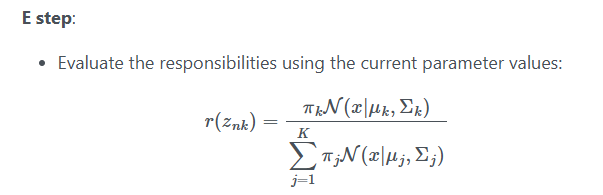

In [100]:

def e_step(data: pd.DataFrame, K: int, mixing_coeffs: np.array, means: np.array, covariances: np.array) -> np.array:
    """Expectation step of the EM algorithm

    Args:
        data (pd.DataFrame): Data
        K (int): Number of clusters
        mixing_coeffs (np.array): Mixing coefficients of the model
        means (np.array): Means of the model
        covariances (np.array): Covariances of the model

    Returns:
        np.array: Posterior probabilities
    """
    posterior_probs = np.zeros((len(data), K))
    for i in range(len(data)):
        x = data.iloc[i, :2].values
        for k in range(K):
            num = mixing_coeffs[k] * gaussian_density(x, means[k], covariances[k])
            denom = np.sum([mixing_coeffs[j] * gaussian_density(x, means[j], covariances[j]) for j in range(K)])
            posterior_probs[i, k] = num / denom
            
    return posterior_probs


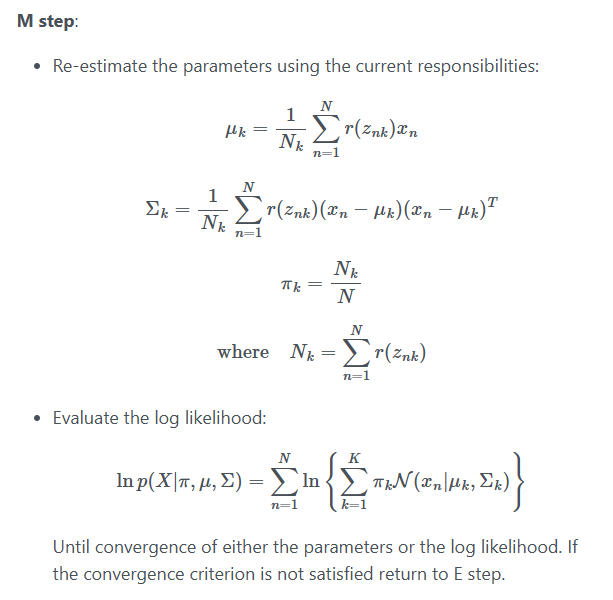

In my code, the M-step function only updates the parameters. We evaluate the log-likelihood in the loop.

In [101]:
from typing import Tuple

def m_step(data: pd.DataFrame, K: int, posterior_probs: np.array) -> Tuple[np.array, np.array, np.array]:
    """Maximization step of the EM algorithm

    Args:
        data (pd.DataFrame): Data
        K (int): Number of clusters
        posterior_probs (np.array): Posterior probabilities

    Returns:
        Tuple[np.array, np.array, np.array]: New mixing coefficients, means, and covariances
    """
    N_k = np.sum(posterior_probs, axis=0)
    mixing_coeffs = N_k / len(data)
    means = np.array([np.sum(posterior_probs[:, k][:, np.newaxis] * data.iloc[:, :2].values, axis=0) / N_k[k] for k in range(K)])
    covariances = np.array([
        np.sum([posterior_probs[i, k] * np.outer(data.iloc[i, :2].values - means[k], data.iloc[i, :2].values - means[k]) for i in range(len(data))], axis=0) / N_k[k]
        for k in range(K)
    ])
    
    return mixing_coeffs, means, covariances


Here is the loop that trains the GMM.

In [102]:
def execute_scratch_gmm(data: pd.DataFrame, K: int, train_means: np.array, train_covariances: np.array, train_mixing_coeffs: np.array, max_iter: int = 100, tolerance: float = 1e-3) -> Tuple[np.array, np.array, np.array, list]:
    """Execute the EM algorithm for a GMM

    Args:
        data (pd.DataFrame): Data
        K (int): Number of clusters
        train_means (np.array): Initial means
        train_covariances (np.array): Initial covariances
        train_mixing_coeffs (np.array): Initial mixing coefficients
        max_iter (int, optional): Maximum number of iterations. Defaults to 100.
        tolerance (float, optional): Tolerance for convergence. Defaults to 1e-3.

    Returns:
        Tuple[np.array, np.array, np.array, list]: Mixing coefficients, means, covariances, and log likelihoods
    """
    log_likelihoods = []
    train_means_history = [train_means]

    for i in range(max_iter):
        # Execute the E-step
        posterior_probs = e_step(data, K, train_mixing_coeffs, train_means, train_covariances)

        # Execute M-step
        # Update the parameters    
        train_mixing_coeffs, train_means, train_covariances = m_step(data, K, posterior_probs)
        train_means_history.append(train_means)

        # Evaluate the log likelihood
        current_log_likelihood = log_likelihood(data, K, train_mixing_coeffs, train_means, train_covariances)
        log_likelihoods.append(current_log_likelihood)

        # Check for convergence
        if i > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
            print(f"Converged after {i} iterations")
            break

    return train_mixing_coeffs, train_means, train_covariances, log_likelihoods, train_means_history

train_mixing_coeffs, train_means, train_covariances, log_likelihoods, train_means_history = execute_scratch_gmm(scratch_data_2d, K, train_means, train_covariances, train_mixing_coeffs)

Converged after 12 iterations


For comparison, I also trained a GMM using the sklearn library.

In [103]:
gmm_ground_truth = GaussianMixture(n_components=K)
gmm_ground_truth.fit(scratch_data_2d[["X1", "X2"]])

predicted_clusters = gmm_ground_truth.predict(scratch_data_2d[["X1", "X2"]])

Text(0, 0.5, 'Log likelihood')

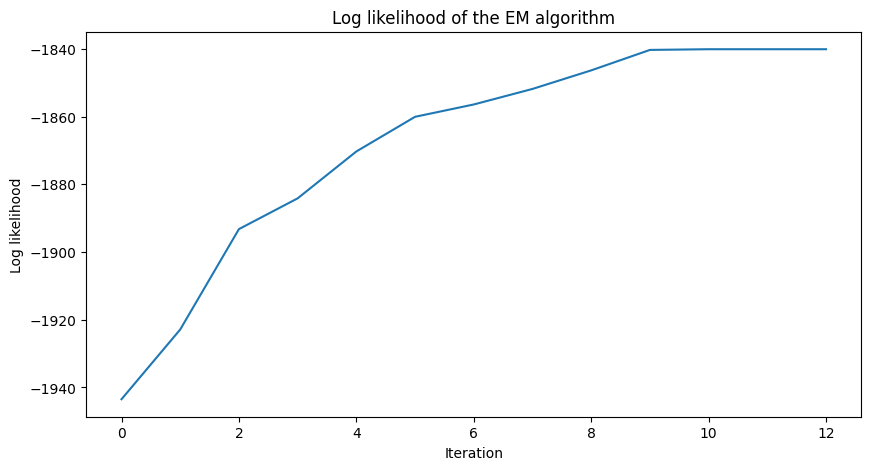

In [104]:
plt.figure(figsize=(10,5))
plt.plot(log_likelihoods)
plt.title("Log likelihood of the EM algorithm")
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")

We can see how the centroid updated over iterations for the from-scratch GMM.

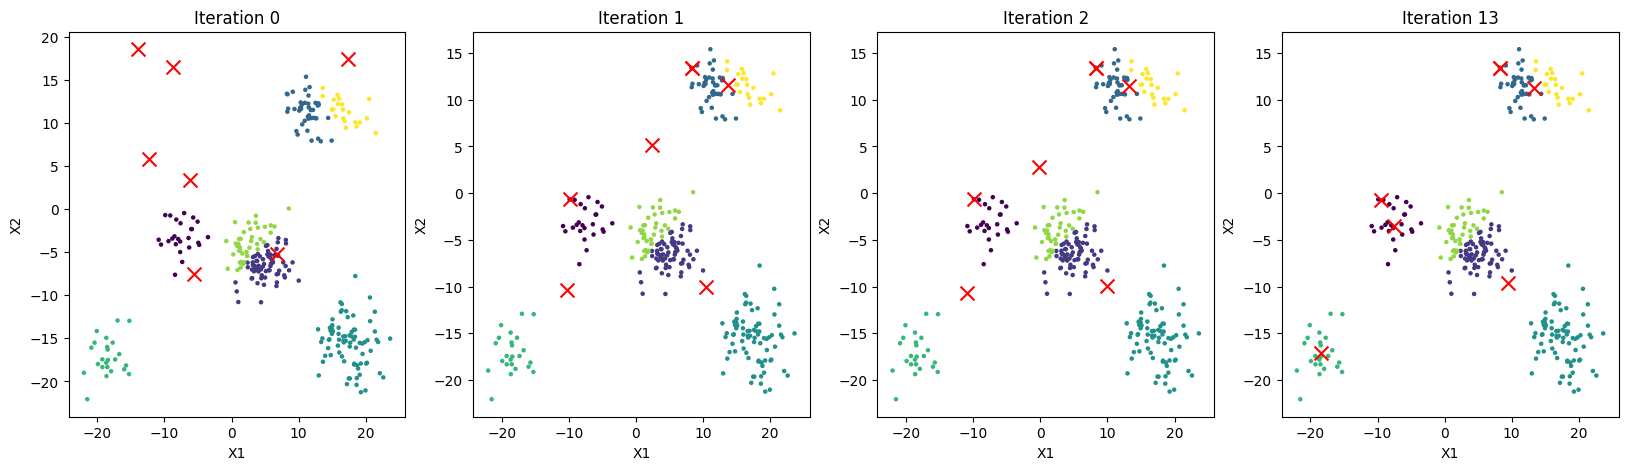

In [105]:
plt.subplots(1, 4, figsize=(20,5))

for i, iteration in enumerate([0, 1, 2, len(train_means_history)-1]):
    plt.subplot(1, 4, i+1)
    plt.scatter(scratch_data_2d["X1"], scratch_data_2d["X2"], c=predicted_clusters, s=5)
    for j in range(K):
        plt.scatter(train_means_history[iteration][j][0], train_means_history[iteration][j][1], s=100, c="red", marker="x")
    plt.title(f"Iteration {iteration}")
    plt.xlabel("X1")
    plt.ylabel("X2")

Text(0, 0.5, 'X2')

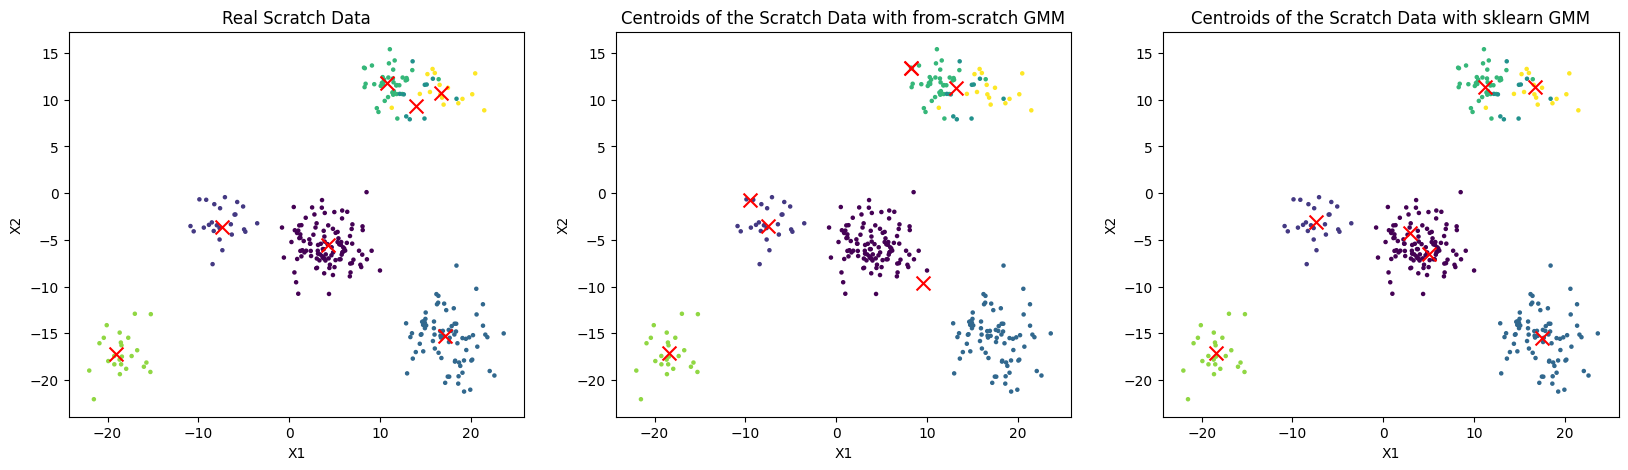

In [106]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.scatter(scratch_data_2d["X1"], scratch_data_2d["X2"], c=scratch_data_2d["truth"], s=5)
for i in range(K):
    plt.scatter(means[i][0], means[i][1], s=100, c="red", marker="x")
plt.title("Real Scratch Data")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1, 3, 2)
plt.scatter(scratch_data_2d["X1"], scratch_data_2d["X2"], c=scratch_data_2d["truth"], s=5)
for i in range(K):
    plt.scatter(train_means[i][0], train_means[i][1], s=100, c="red", marker="x")
plt.title("Centroids of the Scratch Data with from-scratch GMM")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1, 3, 3)
plt.scatter(scratch_data_2d["X1"], scratch_data_2d["X2"], c=scratch_data_2d["truth"], s=5)
for i in range(K):
    plt.scatter(gmm_ground_truth.means_[i][0], gmm_ground_truth.means_[i][1], s=100, c="red", marker="x")
plt.title("Centroids of the Scratch Data with sklearn GMM")
plt.xlabel("X1")
plt.ylabel("X2")


As we can see, the from scratch GMM is quite as good at finding the clusters as the sklearn GMM

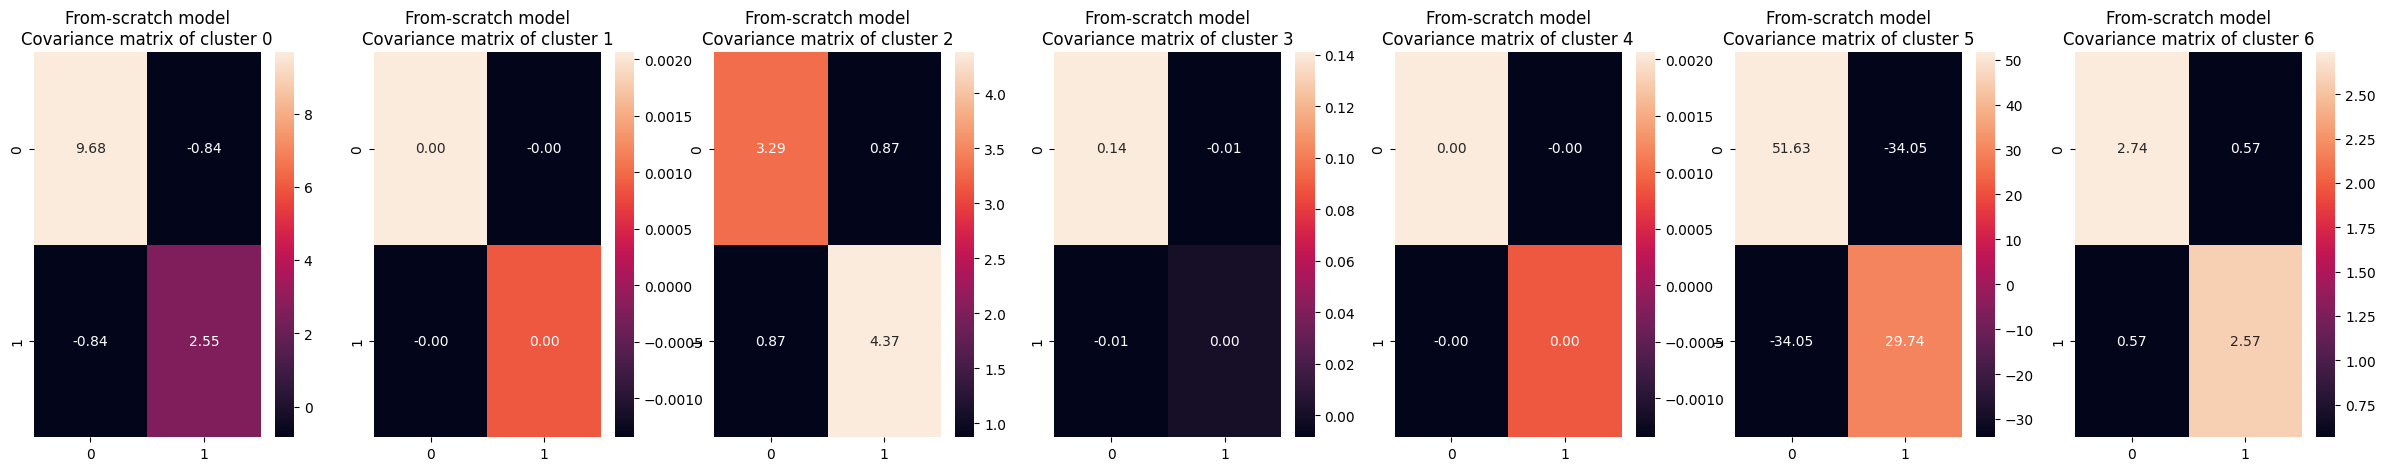

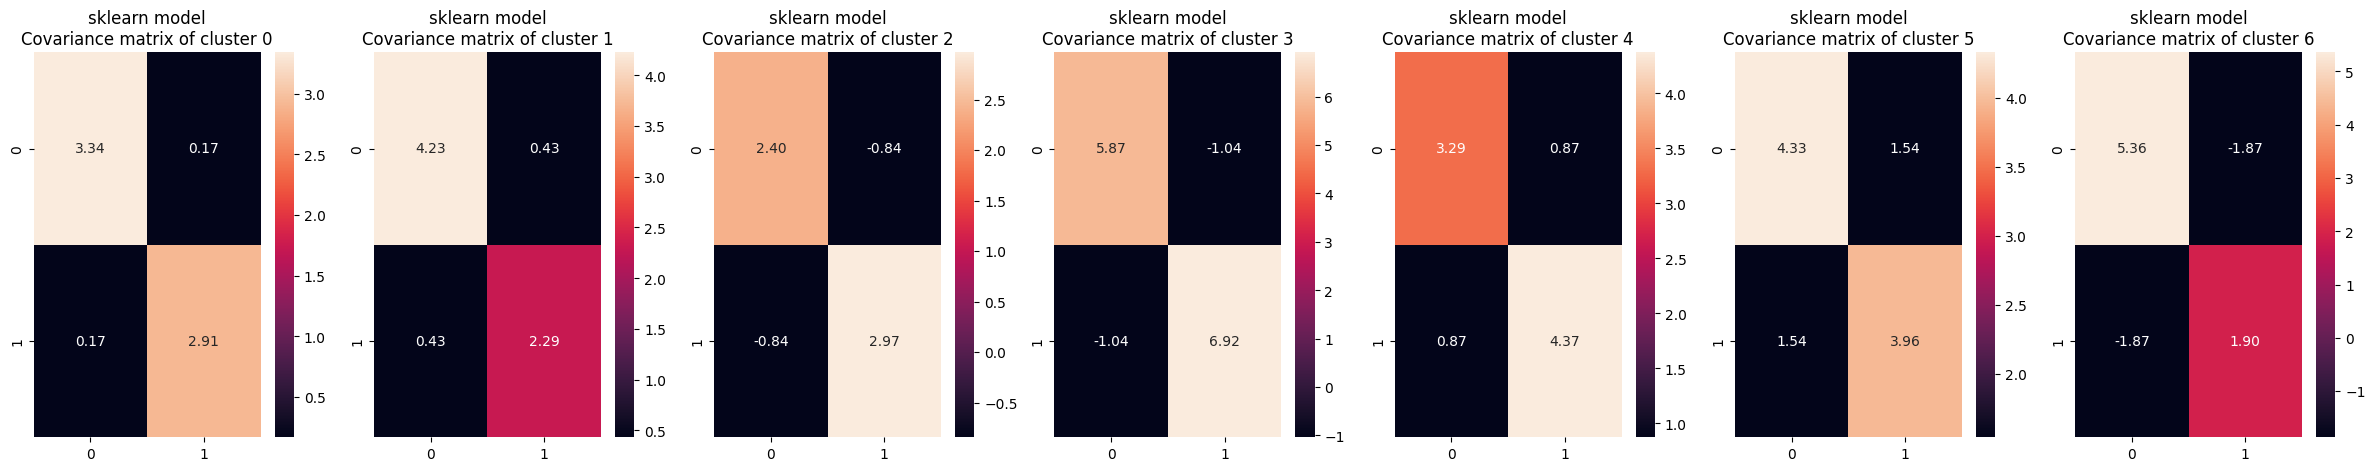

In [107]:
plt.figure(figsize=(30,5))

for i in range(K):
    plt.subplot(1, K, i+1)
    sns.heatmap(convert_to_python_floats(train_covariances[i]), annot=True, fmt=".2f")
    plt.title(f"From-scratch model\nCovariance matrix of cluster {i}")

plt.figure(figsize=(30,5))  
for i in range(K):
    plt.subplot(1, K, i+1)
    sns.heatmap(gmm_ground_truth.covariances_[i], annot=True, fmt=".2f")
    plt.title(f"sklearn model\nCovariance matrix of cluster {i}")

For most of the clusters, we can notice that the matrices tend to be diagonal, respecting the circular shape we defined.

The covariance matrices are quite similar for both sklearn and from-scratch GMM.

### From-scratch GMM on `Iris Dataset`

In [108]:
iris = pd.read_csv("./assets/iris.data")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [109]:
classes = {
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2
}

iris["class"] = iris["class"].map(classes)

Let's try to apply the from-scratch GMM on sepal_length and petal_length of the Iris dataset.

In [110]:
print('There are ' + str(len(iris["class"].unique())) + ' clusters')

There are 3 clusters


We must apply PCA to reduce the dimensionality of the data to 2D.

Text(0, 0.5, 'PC2')

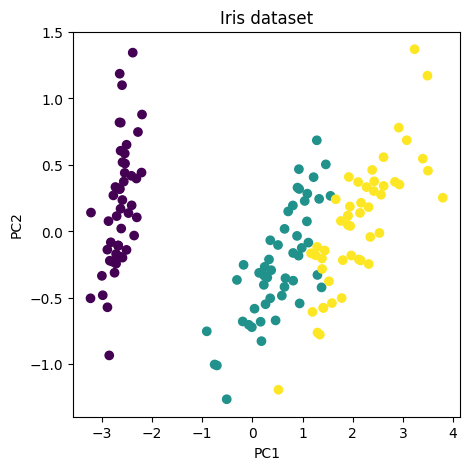

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.iloc[:, :-1])
df_iris_pca = pd.DataFrame(iris_pca, columns=["PC1", "PC2"])

plt.figure(figsize=(5,5))
plt.scatter(df_iris_pca["PC1"], df_iris_pca["PC2"], c=iris["class"])
plt.title("Iris dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")


In [112]:
iris_means, iris_covariances, iris_mixing_coeffs = create_parameters(3)

iris_mixing_coeffs, iris_means, iris_covariances, iris_log_likelihoods, iris_means_history = execute_scratch_gmm(df_iris_pca, 3, iris_means, iris_covariances, iris_mixing_coeffs)

Converged after 39 iterations


Text(0, 0.5, 'PC2')

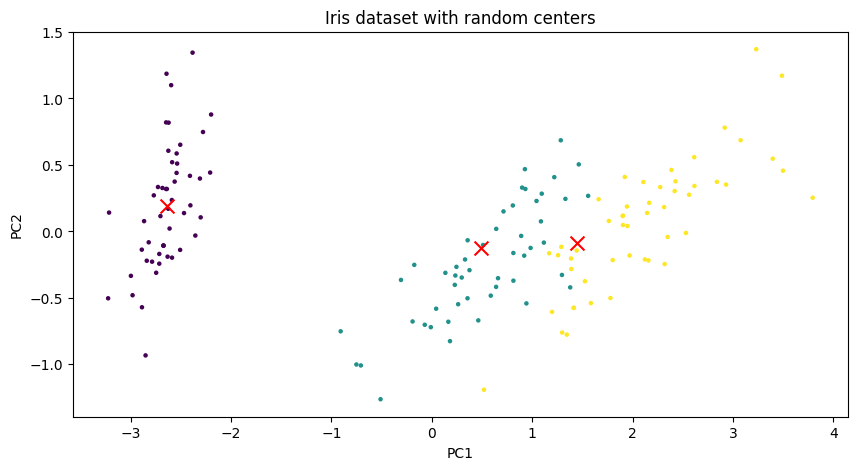

In [113]:
plt.figure(figsize=(10,5))
plt.scatter(df_iris_pca["PC1"], df_iris_pca["PC2"], c=iris["class"], s=5)
for i in range(3):
    plt.scatter(iris_means[i][0], iris_means[i][1], s=100, c="red", marker="x")
plt.title("Iris dataset with random centers")
plt.xlabel("PC1")
plt.ylabel("PC2")


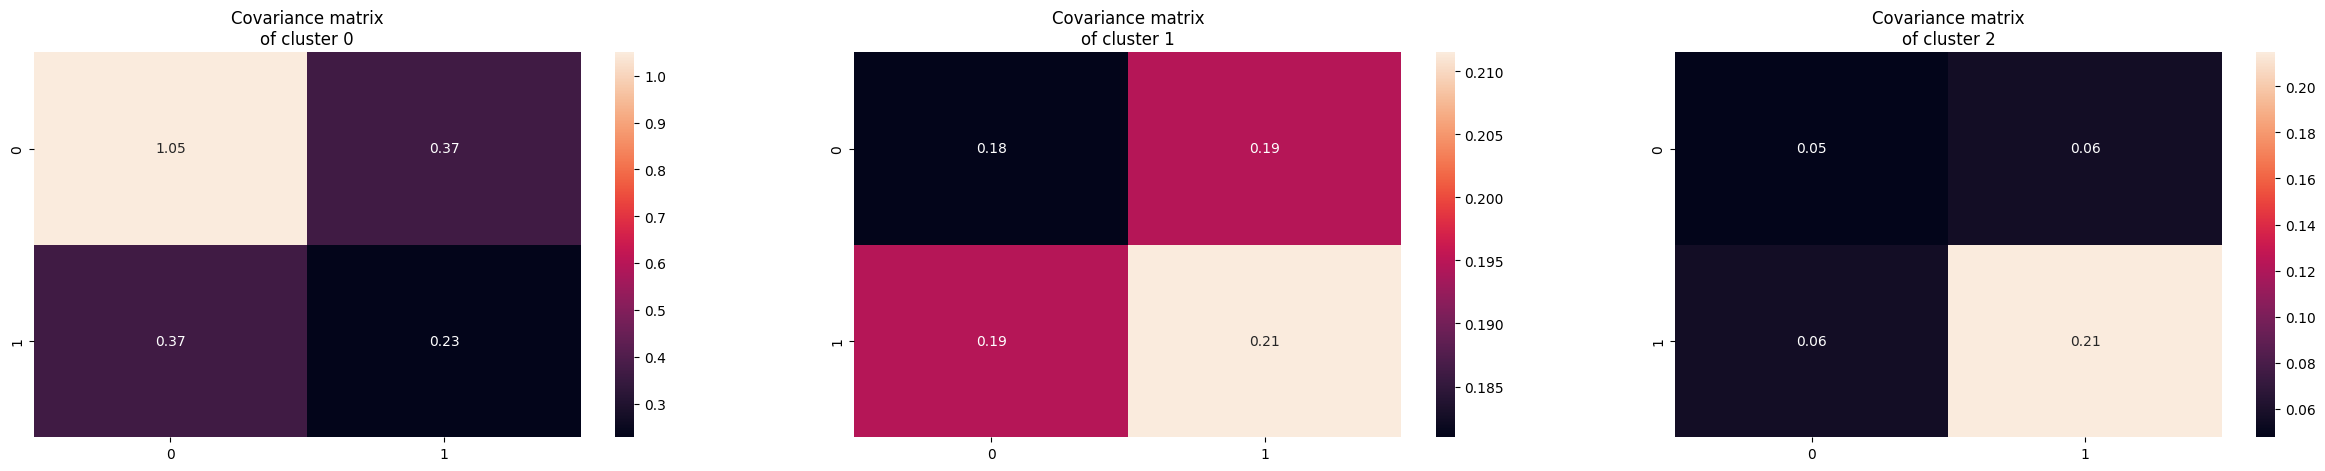

In [114]:
plt.figure(figsize=(30,5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.heatmap(convert_to_python_floats(iris_covariances[i]), annot=True, fmt=".2f")
    plt.title(f"Covariance matrix\nof cluster {i}")

Finally, we can see that from-scratch GMM is able to find the clusters and their means pretty accurately.